In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [6]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [7]:
## Data Preprocessing

In [8]:
#data size
data.shape

(7920, 3)

In [9]:
#duplicate data
data.duplicated().sum()

0

In [10]:
#data null values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [11]:
##text preprocessing
import re
import string

convert uppercase to lowercase

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove link

In [13]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuataions

In [14]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuation)

data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove number

In [15]:
#remove numbers
data['tweet'] = data['tweet'].str.replace('\d+', '', regex=True)
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords by nltk
stopwords ex: is , are 

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
with open('../static/model/corpora/stopwords/english', 'r') as f:
    stopwords = f.read().splitlines()

    

In [19]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [21]:
data['tweet']

0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

Stemming 

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [24]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


Building vacabulary

In [25]:
from collections import Counter
vocab =  Counter()

In [26]:
#vocab.update(['java', 'python', 'c++', 'java'])

In [27]:
vocab

Counter()

In [28]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [29]:
len(vocab)

15949

In [30]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [31]:
tokens = [key for key in vocab if vocab[key] > 10]

In [32]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [33]:
def save_vocabulary(lines , filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocab.txt')

In [34]:
###Divide data into train and test

In [35]:
x= data['tweet']
y = data['label']

In [36]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
 

In [37]:
x_test.shape


(1584,)

In [38]:
x_train.shape

(6336,)

In [39]:
def vectorizer(ds, vocab):
    vectorized_lst = []
    for sentence in ds:
        sentence_list = np.zeros(len(vocab))
        
        for i in range(len(vocab)):
            if vocab[i] in sentence.split():
                sentence_list[i] = 1
        
        vectorized_lst.append(sentence_list)
        
    vector_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vector_new

In [40]:
vectorized_x_train = vectorizer(x_train, tokens)
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
vectorized_x_test = vectorizer(x_test, tokens)
vectorized_x_test[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [42]:
!pip install imbalanced-learn

In [43]:
##handle imbalance data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9420, 1145) (9420,)


In [44]:
y_train_smote.value_counts()

label
1    4710
0    4710
Name: count, dtype: int64

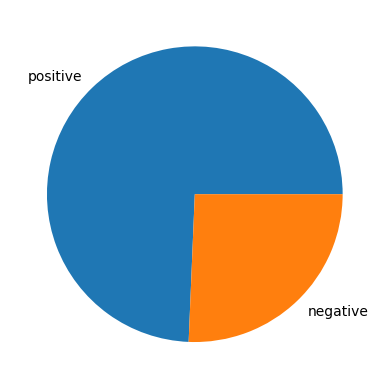

In [45]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['positive', 'negative'])
plt.show()

In [46]:
#model training and evaluation

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [71]:
from sklearn.metrics import  accuracy_score, f1_score , precision_score , recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy: {acc} \n\tPrecision: {pr} \n\tRecall: {rec} \n\tF1: {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: \n\tAccuracy: {acc} \n\tPrecision: {pr} \n\tRecall: {rec} \n\tF1: {f1}')

In [62]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)



LogisticRegression()

In [64]:
lr_pred_train = lr.predict(vectorized_x_train_smote)

In [63]:
lr_pred_train

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
y_train_smote

0       1
1       0
2       1
3       1
4       0
       ..
9415    1
9416    1
9417    1
9418    1
9419    1
Name: label, Length: 9420, dtype: int64

In [65]:
training_scores(y_train_smote, lr_pred_train)

Training Scores: 
	Accuracy: 0.94 
	Precision: 0.917 
	Recall: 0.968 
	F1: 0.941


In [67]:
lr_pred_test = lr.predict(vectorized_x_test)

In [68]:
lr_pred_test

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
y_test

7294    0
6320    1
4162    0
2442    0
7227    1
       ..
1678    0
3574    1
1825    0
7064    0
6809    0
Name: label, Length: 1584, dtype: int64

In [72]:
validation_scores(y_test, lr_pred_test)

Validation Scores: 
	Accuracy: 0.874 
	Precision: 0.71 
	Recall: 0.85 
	F1: 0.774


In [73]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores: 
	Accuracy: 0.94 
	Precision: 0.917 
	Recall: 0.968 
	F1: 0.941
Validation Scores: 
	Accuracy: 0.874 
	Precision: 0.71 
	Recall: 0.85 
	F1: 0.774


In [76]:
#multinomial naive bayes
multinomial = MultinomialNB()
multinomial.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = multinomial.predict(vectorized_x_train_smote)
y_test_pred = multinomial.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 0.906 
	Precision: 0.868 
	Recall: 0.956 
	F1: 0.91
Validation Scores: 
	Accuracy: 0.868 
	Precision: 0.676 
	Recall: 0.918 
	F1: 0.778


In [77]:
#decision tree
dr = DecisionTreeClassifier()
dr.fit(vectorized_x_train_smote, y_train_smote)
y_train_pred = dr.predict(vectorized_x_train_smote)
y_test_pred = dr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 1.0 
	Precision: 1.0 
	Recall: 1.0 
	F1: 1.0
Validation Scores: 
	Accuracy: 0.826 
	Precision: 0.668 
	Recall: 0.62 
	F1: 0.643


In [78]:
#random forest

rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 1.0 
	Precision: 1.0 
	Recall: 1.0 
	F1: 1.0
Validation Scores: 
	Accuracy: 0.867 
	Precision: 0.752 
	Recall: 0.705 
	F1: 0.728


In [79]:
#support vector machine
sv = SVC()
sv.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = sv.predict(vectorized_x_train_smote)
y_test_pred = sv.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 0.978 
	Precision: 0.961 
	Recall: 0.997 
	F1: 0.979
Validation Scores: 
	Accuracy: 0.879 
	Precision: 0.736 
	Recall: 0.81 
	F1: 0.771


In [80]:
import pickle

with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)